In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Categorize transactions into more generic groups to avoid too many categories
def main_categories(category):
    categories = {
        ('Groceries','Shopping','Restaurants','Fast Food','Coffee Shops','Food & Dining','Alcohol & Bars'):'Food',
        ('Parking', 'Service & Parts', 'Auto & Transport', 'Rental Car & Taxi','Public Transportation'):'Transportation',
        ('Gas & Fuel','adf'):'Gas',
        ('Babysitter & Daycare','Kids Activities'): 'Nina',
        ('Home Improvement','Furnishings','Home Services','Home'): 'House',
        ('Pharmacy','Personal Care', 'Hair','Doctor','Eyecare'): 'Health',
        ('Clothing','Books'):'Shopping',
        ('Music','Newspapers & Magazines','Amusement', 'Movies & DVDs','Entertainment'):'Entertainment',
        ('Finance Charge','asfdasdf'): 'Finance Charge',
        ('Mobile Phone','Internet'): 'Bills',
        ('Gift','Charity'): 'Gift'
    }

    categories_map = {}
    for k, v in categories.items():
        for key in k:
            categories_map[key] = v
            
    if category not in categories_map.keys():
        categories_map[category] = 'Other'
            
    return categories_map.get(category)

In [3]:
def all_data_df(transactions_file):
    # import data
    all_data = pd.read_csv(transactions_file)

    # Modify columns
    all_data.drop(columns=['Labels','Notes'], inplace=True)
    all_data['Date'] = pd.to_datetime(all_data['Date'], format='%m/%d/%Y')
    all_data['Main_Category'] = all_data.apply(
        lambda row: main_categories(row.Category), axis=1)
    
    return all_data

In [35]:
# Extract expenses for the [start, end] period
def range_expenses(data_df, start, end):
    range_exp = data_df.loc[(data_df['Date'] >= start) &
                          (data_df['Date'] <= end) &
                          (data_df['Transaction Type'] == 'debit') &
                          (data_df['Account Name'] == 'Ivan Credit Sapphire')
                        ]
    return range_exp

In [63]:
transact_file = '../input/transactions2.csv'
all_data = all_data_df(transact_file)

start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2022, 12, 30)
month = end_date.strftime('%Y')
# Take a look at August 2021
exp_df = range_expenses(all_data, start_date, end_date)

In [64]:
all_data.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Main_Category
0,2022-12-06,Express Stop,FOOD EXPRESS TOBYHANNA,49.54,debit,Gas & Fuel,Ivan Credit Sapphire,Gas
1,2022-12-06,Express Stop,FOOD EXPRESS TOBYHANNA,1.59,debit,Gas & Fuel,Ivan Credit Sapphire,Gas
2,2022-12-06,Express Stop,FOOD EXPRESS TOBYHANNA,65.95,debit,Gas & Fuel,Ivan Credit Sapphire,Gas
3,2022-12-06,DUNKIN #357324,DUNKIN #357324,1.59,debit,Coffee Shops,Ivan Credit Sapphire,Food
4,2022-12-06,ORIG CO NAME:PAYMENT FOR AMZ CO,ORIG CO NAME:PAYMENT FOR AMZ CO,123.44,debit,Shopping,Ivan Debit Chase,Food


In [65]:
exp_df.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Main_Category
0,2022-12-06,Express Stop,FOOD EXPRESS TOBYHANNA,49.54,debit,Gas & Fuel,Ivan Credit Sapphire,Gas
1,2022-12-06,Express Stop,FOOD EXPRESS TOBYHANNA,1.59,debit,Gas & Fuel,Ivan Credit Sapphire,Gas
2,2022-12-06,Express Stop,FOOD EXPRESS TOBYHANNA,65.95,debit,Gas & Fuel,Ivan Credit Sapphire,Gas
3,2022-12-06,DUNKIN #357324,DUNKIN #357324,1.59,debit,Coffee Shops,Ivan Credit Sapphire,Food
6,2022-12-05,AMK LIBERTY SCIENCE CENTE,AMK LIBERTY SCIENCE CENTE,8.00,debit,Restaurants,Ivan Credit Sapphire,Food


# Expenses

In this section we are analyzing the expenses with some visual representation of data.
First, how the expenses are distrubuted across the month.

<AxesSubplot:xlabel='Date'>

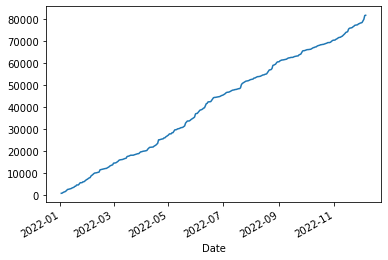

In [48]:
# See how expenses are distributed across the time range selected
exp_rev = exp_df.iloc[::-1].reset_index(drop=True)
exp_rev = exp_rev.groupby(['Date']).sum()
exp_rev['Amount'].cumsum().plot()

Text(92.40889289392372, 422.415, 'Mean: 84.01')

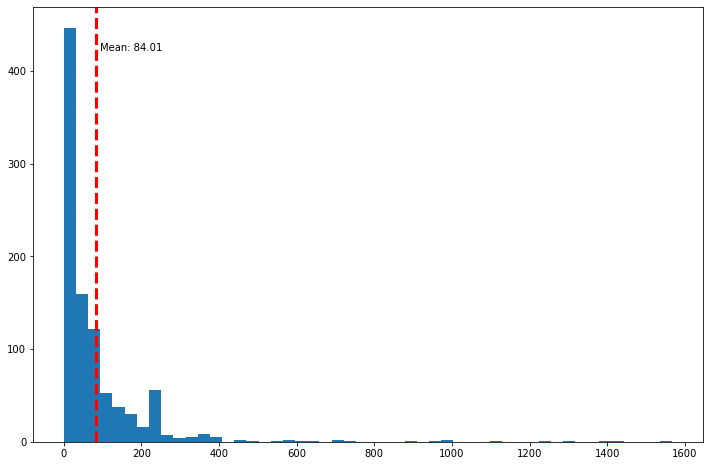

In [40]:
x = exp_df['Amount']
plt.figure(figsize=(12,8))
result = plt.hist(x, bins=50)
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

In [305]:
#all_data[all_data.Amount < 500].hist(bins=100, figsize=(12,8))

In [367]:
# Check if any Main_Categories can be added
#exp_df[exp_df.Main_Category == 'Other']

In [53]:
exp_by_category = exp_df.groupby(['Main_Category']).sum()

In [54]:
exp_by_category.sort_values('Amount', ascending = False)

,Amount
Main_Category,
Food,23090.73
Other,17975.51
Nina,11037.55
Shopping,6714.09
Gas,6554.69
Transportation,6496.12
Bills,2468.51
House,1954.40
Finance Charge,1557.46


In [58]:
print('Total for {}: {:.2f}'.format(month, exp_df.Amount.sum()))

Total for 2023: 81571.85


<AxesSubplot:ylabel='Amount'>

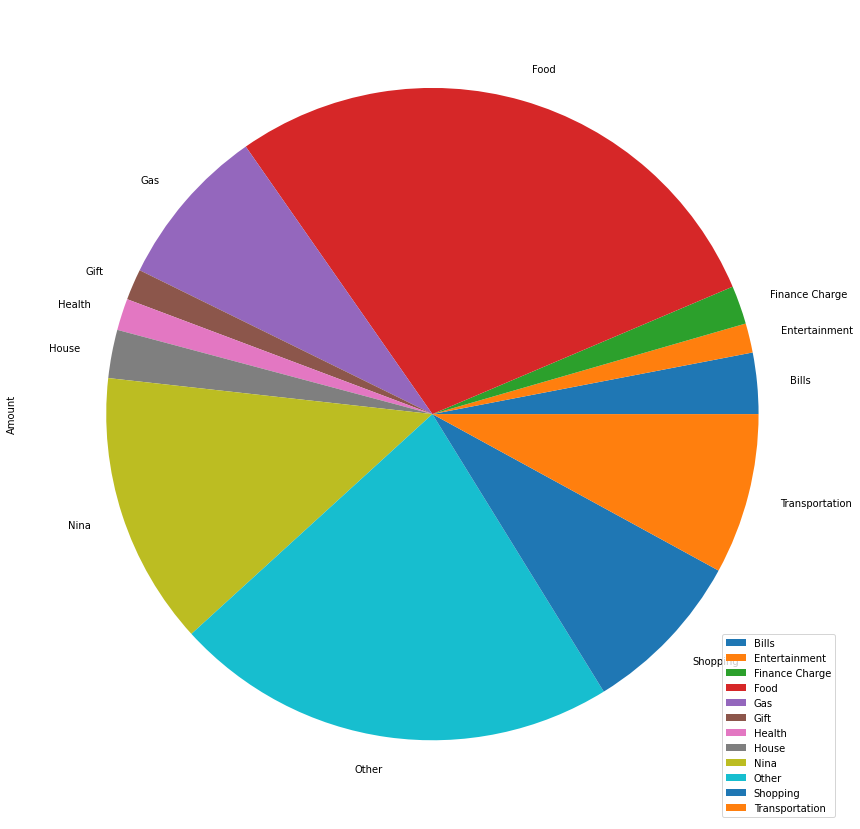

In [59]:
exp_by_category.plot.pie(y='Amount', figsize=(15,15))

In [60]:
exp_by_merch = exp_df.groupby(['Description']).sum()

In [61]:
exp_by_merch.sort_values('Amount', ascending=False).head(10)

,Amount
Description,
PY *WEE WONS,11005.55
Express Stop,4414.22
AE.COM,2953.00
THE TIRE RACK,2434.73
GEICO *AUTO,2274.24
"BUTCHERBOX, LLC",1857.00
CL *Chase Travel,1774.11
PURCHASE INTEREST CHARGE,1557.46
GIANT MARTINS #6504,1492.12


In [62]:
exp_df[exp_df.Description == 'FLOWMINI']

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Main_Category
1185,2022-03-16,FLOWMINI,FLOWMINI,447.12,debit,Clothing,Ivan Credit Sapphire,Shopping
